In [1]:
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

batting_csv_path = "../Data/team.csv"

complete_df =  pd.read_csv(batting_csv_path)
#complete_df

In [2]:
#complete_df.columns

In [3]:
dh_df = pd.DataFrame(complete_df[['year', 'league_id', 'franchise_id','rank', 'g','ghome', 'w', 'l','r', 'ab',
                                'h', 'double', 'triple', 'hr', 'bb', 'so','ra', 'er', 'era',
                                'sho','ha', 'hra', 'bba','soa', 'e', 'dp', 'fp','attendance','bpf', 'ppf']])


In [4]:
rename_df = dh_df.rename(columns={'year':"Year", 'league_id':"League",'franchise_id':"Franchise", 'rank':"Rank",
                                 'g':"Games", 'w':"Wins", 'l':"Loses",'r':"Runs",'ab':"At_Bats", 'h': "Hits", 
                                 "double":"Doubles", 'triple':"Triples", 'hr':"HR", 'bb':"BB", 'so':"SO", 'ra':"RA",
                                 'er':"ER", 'era':"ERA", 'sho':"SHO", 'ha':"HA", 'hra':"HRA", 'bba':"BBA", 'soa':"SOA",
                                 'e':"Errors", 'dp':"DP",'fp':"FP", 'attendance':"Attendance", 'bpf':"DPF", 'ppf':"PPF"})

rename_df.columns

rename_df["Year"].dtypes

dtype('int64')

In [5]:
Modern_df = rename_df.loc[(rename_df["Year"] > 1950)]

NL_df = Modern_df.loc[(rename_df["League"]== "NL")]

AL_df = Modern_df.loc[(rename_df["League"]== "AL")]
AL_df.reset_index()

AL_df.index = AL_df["Year"]
NL_df.index = NL_df["Year"]

In [6]:
# Has the Addition of the DH added more runs for the AL vs. the NL

AL_Runs = pd.DataFrame(AL_df[["Year","Runs", "Games"]])
NL_Runs = pd.DataFrame(NL_df[["Year","Runs", "Games"]])

AL_Runs1 = pd.DataFrame(AL_Runs[["Runs","Games"]])
NL_Runs1 = pd.DataFrame(NL_Runs[["Runs","Games"]])

In [7]:
grouped_Runs_AL = AL_Runs1.groupby("Year")
grouped_Runs_NL = NL_Runs1.groupby("Year")

AL_Sums = grouped_Runs_AL["Runs"].sum() #Average Runs per game, per year 
NL_Sums = grouped_Runs_NL["Runs"].sum() #Average Runs per game, per year 

AL_RPG = pd.DataFrame(grouped_Runs_AL["Runs"].sum()/grouped_Runs_AL["Games"].sum())
NL_RPG = pd.DataFrame(grouped_Runs_NL["Runs"].sum()/grouped_Runs_NL["Games"].sum())

Difference = pd.DataFrame(AL_RPG-NL_RPG)

Diff3 = Difference.rename(columns={0: "Run_Difference"})

Diff_reset = Diff3.reset_index()

In [8]:
#AL_RPG[0].plot(kind= "line", color= "b")
#NL_RPG[0].plot(kind= "line", color= "r")
x_axis5 = Diff_reset["Year"]

#AL_Plot = plt.plot(x_axis5, AL_RPG[0], color="b",  marker="o", label= "AL")
#NL_Plot = plt.plot(x_axis5, NL_RPG[0], color="b",  marker="o", label= "NL")

#plt.plot(x_axis, vc_fit3, "b--", color= "r")

vc_slope3, vc_int3, vc_r3, vc_p3, vc_std_err3 = stats.linregress(
   x_axis5, AL_RPG[0])
vc_fit3 = vc_slope3 * x_axis5 + vc_int3
plt.show()

In [9]:
x_axis = Diff_reset["Year"]
y_axis = Diff3["Run_Difference"]

vc_slope2, vc_int2, vc_r2, vc_p2, vc_std_err2 = stats.linregress(
    x_axis, y_axis)
vc_fit2 = vc_slope2 * x_axis + vc_int2

<IPython.core.display.Javascript object>


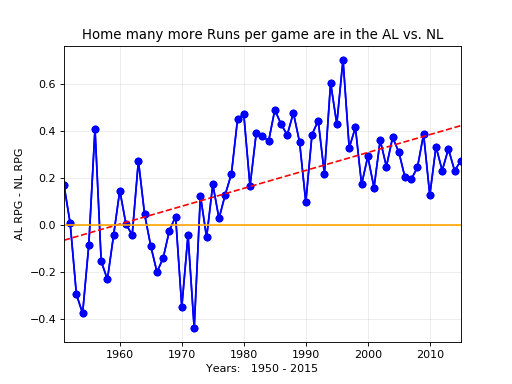

Since the Adoption of the DH, the AL has scored 0.179 more runs than the NL for each game, each year


In [10]:
Diff3["Run_Difference"].plot(kind= "line", color= "b", marker="o")
plt.plot(x_axis, y_axis, color="b",  marker="o")

plt.plot(x_axis, vc_fit2, "b--", color= "r")
plt.plot(x_axis, [0 for _ in range(len(x_axis))], color = "orange")

plt.title("Home many more Runs per game are in the AL vs. NL")
plt.xlabel("Years:   1950 - 2015")
plt.ylabel("AL RPG - NL RPG")
plt.grid(alpha= .25)


Average_Run_Dif = Diff3["Run_Difference"].mean()
ARD = round(Average_Run_Dif,3)

print(f"Since the Adoption of the DH, the AL has scored {ARD} more runs than the NL for each game, each year")


In [11]:
# Has the Addition of the DH meant more HR for the AL vs. the NL?

AL_Home_Runs = pd.DataFrame(AL_df[["Year","HR", "Games"]])
NL_Home_Runs = pd.DataFrame(NL_df[["Year","HR", "Games"]])

AL_Home_Runs1 = pd.DataFrame(AL_Home_Runs[["HR","Games"]])

NL_Home_Runs1 = pd.DataFrame(NL_Home_Runs[["HR","Games"]])

In [12]:
grouped_Home_Runs_AL = AL_Home_Runs1.groupby("Year")
grouped_Home_Runs_NL = NL_Home_Runs1.groupby("Year")

AL_Sums_HR = pd.DataFrame(grouped_Home_Runs_AL["HR"].sum()) 
NL_Sums_HR = pd.DataFrame(grouped_Home_Runs_NL["HR"].sum())

AL_HRPG = pd.DataFrame(grouped_Home_Runs_AL["HR"].sum()/grouped_Runs_AL["Games"].sum()*162) #Average Runs per game, per year 
NL_HRPG = pd.DataFrame(grouped_Home_Runs_NL["HR"].sum()/grouped_Runs_NL["Games"].sum()*162) #Average Runs per game, per year 

#Home runs per year difference per year simulated over a normal 162 game season. Had to get per game numbers to factor out 
#the uneven number of teams and games played

HR_Difference = pd.DataFrame(AL_HRPG-NL_HRPG)

HR_Diff2 = HR_Difference.reset_index()

HR_Diff3 = HR_Diff2.rename(columns={0: "HR_Difference"})


In [13]:
x_axis1 = HR_Diff3["Year"]
y_axis1 = HR_Diff3["HR_Difference"]

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(
    x_axis1, y_axis1)
vc_fit = vc_slope * x_axis1 + vc_int

<IPython.core.display.Javascript object>


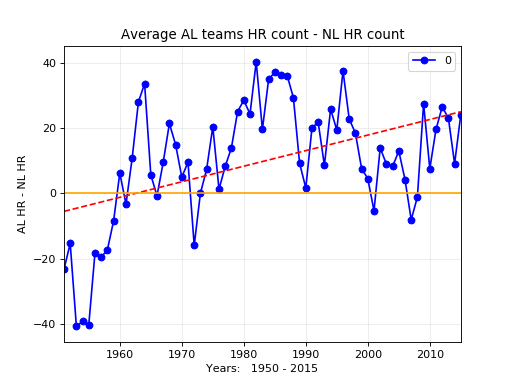

Since the Adoption of the DH, A team in the AL has hit 9.73 more home runs than a tean in the NL for each year


In [14]:
HR_Difference.plot(kind= "line",color= "b", marker="o", label="Home Runs")
plt.scatter(x_axis1, y_axis1, marker="*")
plt.plot(x_axis1, vc_fit, "b--", color= "r")
plt.plot(x_axis1, [0 for _ in range(len(x_axis))], color = "orange")

plt.title("Average AL teams HR count - NL HR count")
plt.xlabel("Years:   1950 - 2015")
plt.ylabel("AL HR - NL HR")
plt.grid(alpha= .25)

plt.show()

Average_HR_Run_Dif = HR_Diff3["HR_Difference"].mean()

AHRD = round(Average_HR_Run_Dif,3)

print(f"Since the Adoption of the DH, A team in the AL has hit {AHRD} more home runs than a tean in the NL for each year")

In [15]:
# Has the Addition of the DH added more runs for the AL vs. the NL

AL_SHO = pd.DataFrame(AL_df[["Year","SHO", "Games"]])
NL_SHO = pd.DataFrame(NL_df[["Year","SHO", "Games"]])

AL_SHO = pd.DataFrame(AL_SHO[["SHO","Games"]])
AL_SHO

NL_SHO = pd.DataFrame(NL_SHO[["SHO","Games"]])
#NL_SHO

In [16]:
grouped_SHO_AL = AL_SHO.groupby("Year")
grouped_SHO_NL = NL_SHO.groupby("Year")

AL_Sums3 = grouped_SHO_AL["SHO"].sum() #SHO per game, per year 
NL_Sums3 = grouped_SHO_NL["SHO"].sum() #Average Runs per game, per year 

AL_SHOPG = pd.DataFrame(grouped_SHO_AL["SHO"].sum()/grouped_SHO_AL["Games"].sum()*162) #FIGURE THIS OUT AGAIN!!!! WHY SO LOW?
NL_SHOPG = pd.DataFrame(grouped_SHO_NL["SHO"].sum()/grouped_SHO_NL["Games"].sum()*162) #IS IT .05 Per game over 43 Years?

Difference_SHO = pd.DataFrame(AL_SHOPG-NL_SHOPG)

Diff5 = Difference_SHO.reset_index()
Diff6 = Diff5.rename(columns={0: "SHO_Difference"})

In [17]:
x_axis3 = Diff6["Year"]
y_axis3 = Diff6["SHO_Difference"]

vc_slope3, vc_int3, vc_r3, vc_p3, vc_std_err3 = stats.linregress(
    x_axis3, y_axis3)
vc_fit3 = vc_slope3 * x_axis3 + vc_int3

<IPython.core.display.Javascript object>


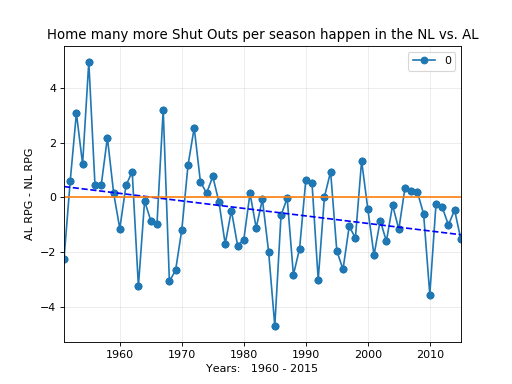

Since the Adoption of the DH, the AL has had -0.487 more Shut Outs than the NL for each game, each year


In [19]:
Difference_SHO.plot(kind= "line",  marker="o", label="Home Runs")
plt.scatter(x_axis3, y_axis3, marker="o")
plt.plot(x_axis3, vc_fit3, "b--")
plt.plot(x_axis3, [0 for _ in range(len(x_axis3))])

plt.title("Home many more Shut Outs per season happen in the NL vs. AL")
plt.xlabel("Years:   1960 - 2015")
plt.ylabel("AL RPG - NL RPG")
plt.grid(alpha= .25)

plt.show()

Average_SHO_Dif = Diff6["SHO_Difference"].mean()

ASD = round(Average_SHO_Dif,3)

print(f"Since the Adoption of the DH, the AL has had {ASD} more Shut Outs than the NL for each game, each year")